In [3]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim.py module
from modsim import *

In [11]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    
    frame = TimeFrame(columns=system.init.index)
    frame.row[system.t0] = system.init
    
    for t in linrange(system.t0, system.t_end/system.dt):
        frame.row[t+1] = update_func(frame.row[t], t, system)
    
    return frame

In [30]:
system = System(init = State(x=1, y=1), alpha = 0.05, beta = 0.1, gamma = 0.1, delta = 0.1, t0 = 0, t_end = 200, dt = 1)

,values
init,x 1 y 1 dtype: int64
alpha,0.05
beta,0.1
gamma,0.1
delta,0.1
t0,0
t_end,200
dt,1


In [31]:
def update_func(state, t, system):
    X, Y = state
    
    dydt = (system.delta*state.x*state.y - system.gamma*state.y)*system.dt
    dxdt = (system.alpha*state.x - system.beta*state.x*state.y)*system.dt
    
    X += dxdt
    Y += dydt
    return State(x = X, y = Y)

In [32]:
update_func(system.init, 1, system)

,values
x,0.95
y,1.00


In [33]:
system.delta

0.1

In [34]:
results = run_simulation(system, update_func);

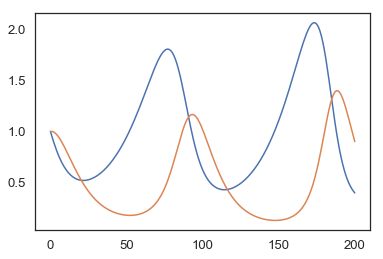

In [35]:
results.x.plot()
results.y.plot()